In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data = pd.read_csv("housing.csv")

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [67]:
data.dropna(inplace=True)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [69]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [70]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [71]:
train_data = x_train.join(y_train)

In [72]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14145,-117.08,32.73,36.0,3331.0,643.0,1903.0,622.0,3.6974,NEAR OCEAN,122000.0
1422,-122.05,38.00,36.0,2476.0,472.0,1213.0,393.0,3.7333,NEAR BAY,136400.0
1731,-122.34,37.97,19.0,392.0,109.0,287.0,81.0,6.0426,NEAR BAY,110000.0
7575,-118.21,33.88,38.0,929.0,166.0,686.0,183.0,3.4485,<1H OCEAN,119400.0
12264,-116.87,33.76,5.0,4116.0,761.0,1714.0,717.0,2.5612,INLAND,130800.0
...,...,...,...,...,...,...,...,...,...,...
13808,-117.06,34.90,36.0,2828.0,916.0,1762.0,736.0,1.4318,INLAND,59600.0
15418,-117.25,33.22,26.0,2010.0,347.0,1160.0,331.0,3.9815,<1H OCEAN,142600.0
11897,-117.37,33.96,33.0,3974.0,548.0,1398.0,528.0,7.2519,INLAND,216600.0
13251,-117.69,34.11,16.0,2427.0,522.0,794.0,491.0,2.6929,INLAND,119300.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

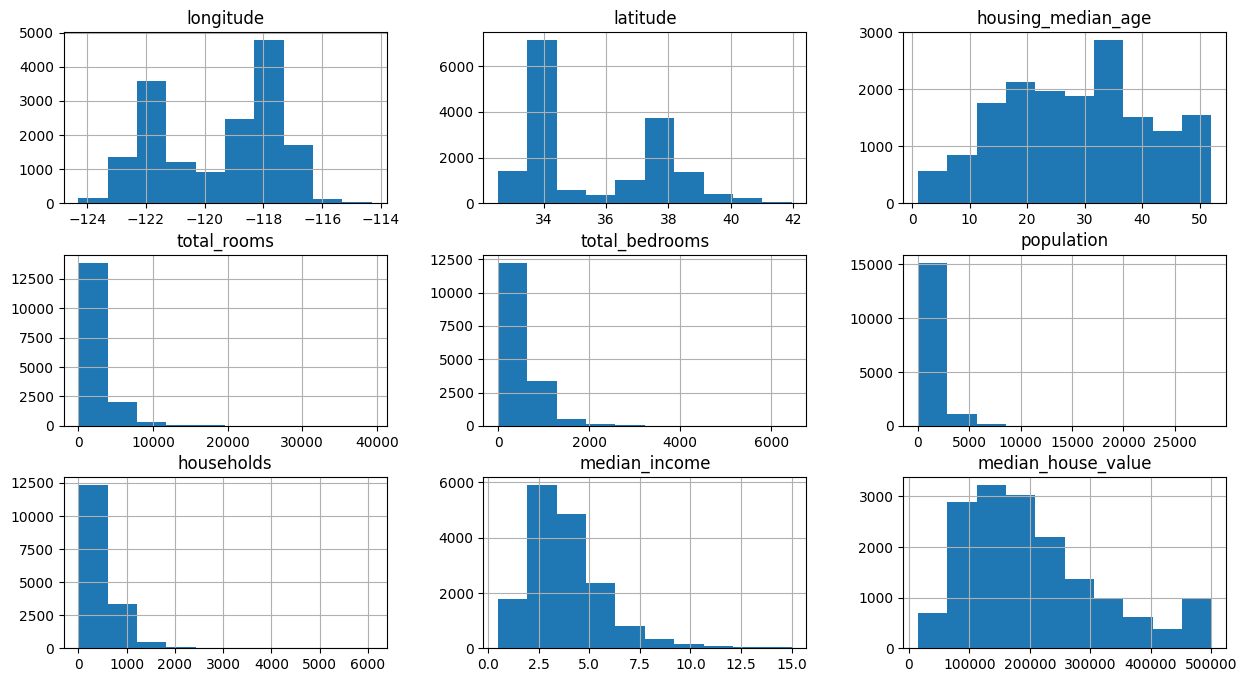

In [73]:
train_data.hist(figsize=(15,8))

In [74]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

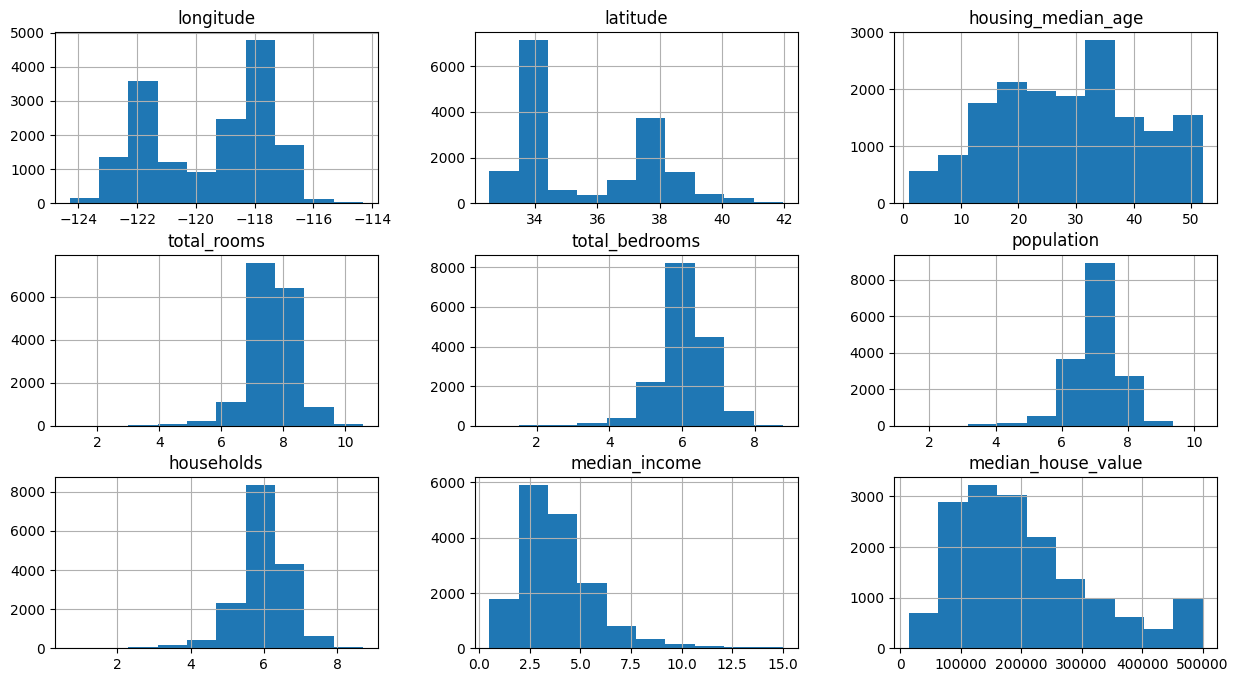

In [75]:
train_data.hist(figsize=(15,8))

In [76]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7228
INLAND        5178
NEAR OCEAN    2103
NEAR BAY      1832
ISLAND           5
Name: count, dtype: int64

In [77]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [78]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14145,-117.08,32.73,36.0,8.111328,6.467699,7.551712,6.434547,3.6974,122000.0,False,False,False,False,True
1422,-122.05,38.00,36.0,7.814803,6.159095,7.101676,5.976351,3.7333,136400.0,False,False,False,True,False
1731,-122.34,37.97,19.0,5.973810,4.700480,5.662960,4.406719,6.0426,110000.0,False,False,False,True,False
7575,-118.21,33.88,38.0,6.835185,5.117994,6.532334,5.214936,3.4485,119400.0,True,False,False,False,False
12264,-116.87,33.76,5.0,8.322880,6.635947,7.447168,6.576470,2.5612,130800.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13808,-117.06,34.90,36.0,7.947679,6.821107,7.474772,6.602588,1.4318,59600.0,False,True,False,False,False
15418,-117.25,33.22,26.0,7.606387,5.852202,7.057037,5.805135,3.9815,142600.0,True,False,False,False,False
11897,-117.37,33.96,33.0,8.287780,6.308098,7.243513,6.270988,7.2519,216600.0,False,True,False,False,False
13251,-117.69,34.11,16.0,7.794823,6.259581,6.678342,6.198479,2.6929,119300.0,False,True,False,False,False


<Axes: >

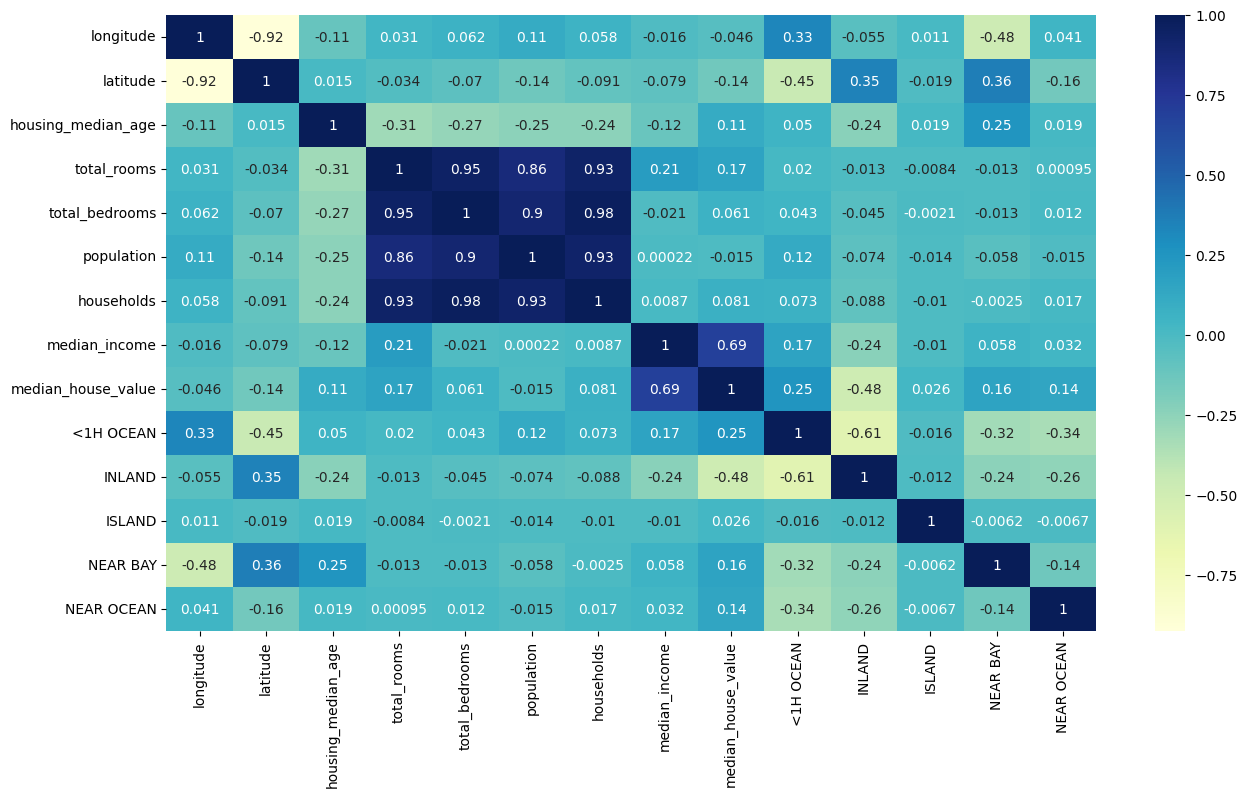

In [79]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

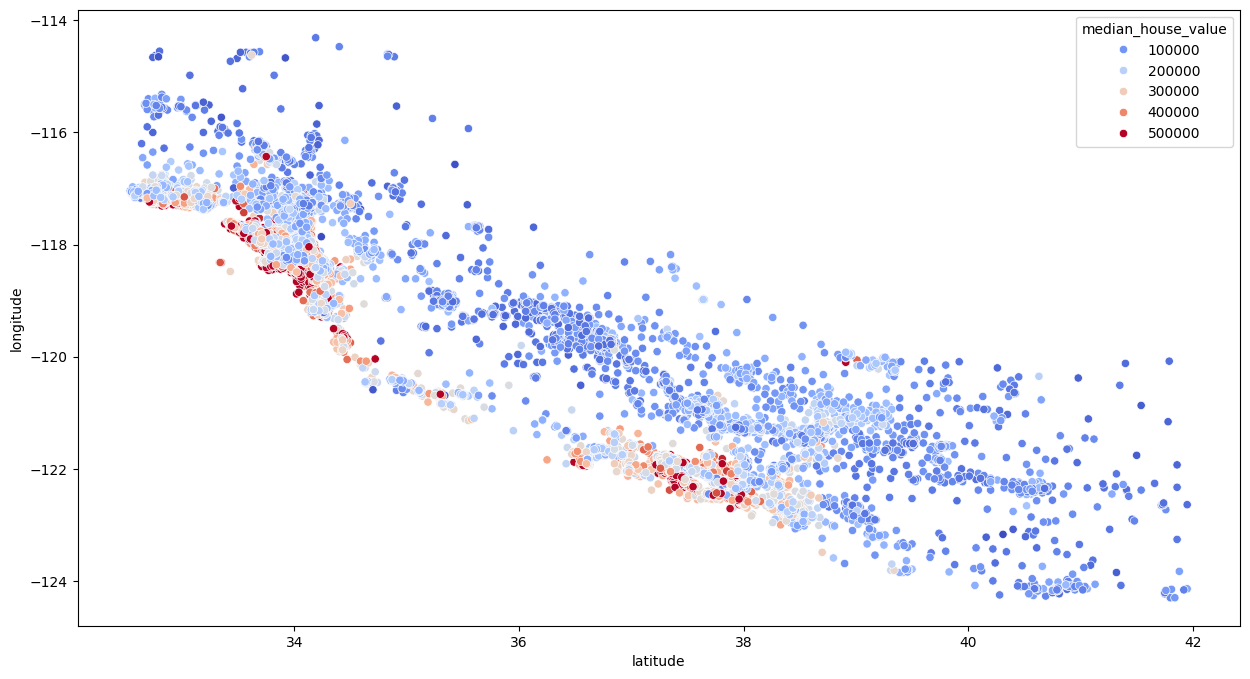

In [80]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data = train_data, hue = "median_house_value", palette="coolwarm")

In [81]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

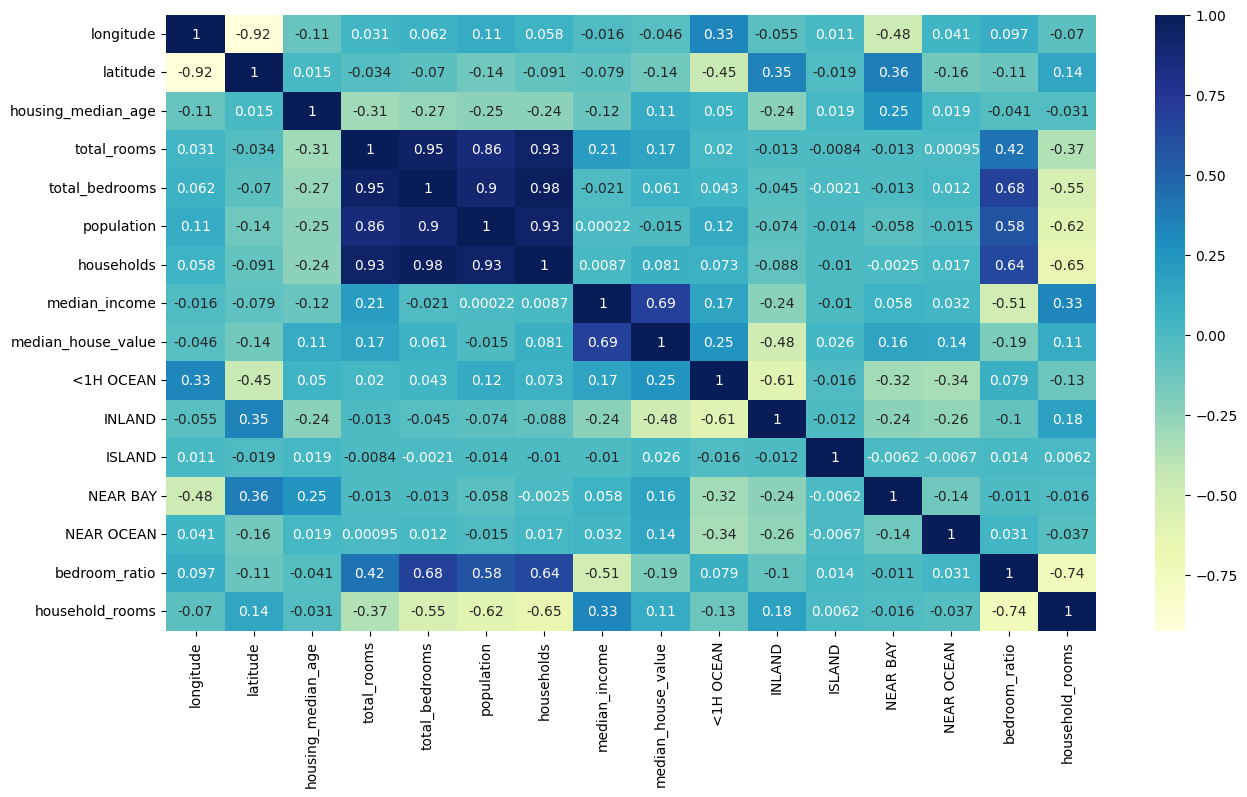

In [82]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train = train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()

reg.fit(x_train_s, y_train)

ValueError: could not convert string to float: 'NEAR OCEAN'

In [84]:
LinearRegression()

LinearRegression()

In [85]:
test_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'bedroom_ratio', 'household_rooms'],
      dtype='object')

In [86]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
2095,-119.76,36.75,35.0,1607.0,383.0,1407.0,382.0,2.1900,INLAND
12719,-121.38,38.61,34.0,2888.0,496.0,1168.0,479.0,3.6053,INLAND
9532,-120.68,37.47,33.0,1028.0,226.0,658.0,197.0,2.3043,INLAND
8462,-118.33,33.91,39.0,1224.0,312.0,1106.0,333.0,3.3491,<1H OCEAN
6795,-118.14,34.08,24.0,3988.0,1098.0,2909.0,1034.0,2.7036,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
11930,-117.39,33.93,26.0,3014.0,494.0,1832.0,485.0,4.8333,INLAND
1816,-122.31,37.93,39.0,2505.0,371.0,872.0,345.0,5.3433,NEAR BAY
15381,-117.19,33.41,16.0,3031.0,554.0,1301.0,518.0,4.0882,<1H OCEAN
14461,-117.28,32.84,21.0,2455.0,660.0,1015.0,597.0,3.7596,NEAR OCEAN


In [87]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [88]:
x_test, y_test = test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [89]:
x_test_s = scaler.transform(x_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- <1H OCEAN
- INLAND
- NEAR BAY
- NEAR OCEAN
- bedroom_ratio
- ...
Feature names seen at fit time, yet now missing:
- ocean_proximity


In [ ]:
reg.score(x_test_s, y_test)

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)

NameError: name 'x_train_s' is not defined

In [ ]:
RandomForestRegressor()

In [28]:
forest.score(x_test_s, y_test)

NameError: name 'x_test_s' is not defined

In [29]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                         scoring ="neg_mean_squared_error",
                         return_train_score = True)

grid_search.fit(x_train_s, y_train)

NameError: name 'x_train_s' is not defined

In [26]:
best_forest = grid_search.best_estimator_

NameError: name 'grid_search' is not defined

In [247]:
best_forest.score(x_test_s, y_test)

0.5526087254605795

In [3]:
data.predict()

NameError: name 'data' is not defined